In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import xarray as xr
#conda install openpyxl ( in terminal in case)

In [3]:
df2_mutual_funds= pd.read_csv('~/da-EDA_project2/archive (1)/MutualFunds.csv', header=0)

In [4]:
df2_mutual_funds['initial_investment'].describe()

count    1.648500e+04
mean     5.179181e+06
std      9.253584e+07
min      1.000000e+01
25%      1.000000e+03
50%      2.500000e+03
75%      5.000000e+05
max      5.000000e+09
Name: initial_investment, dtype: float64

In [5]:
df2_mutual_funds.info()
df2_mutual_funds.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23783 entries, 0 to 23782
Columns: 298 entries, fund_symbol to peer_governance_max
dtypes: float64(277), object(21)
memory usage: 54.1+ MB


,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Count of non-null entries for each column
non_null_counts = df2_mutual_funds.count()

# Data types of each column
data_types = df2_mutual_funds.dtypes

# Combine non-null counts and data types into a new DataFrame
column_info = pd.DataFrame({'Non-Null Counts': non_null_counts, 'Data Types': data_types})

# Display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the column info
#print(column_info)


In [7]:
column_info

,Non-Null Counts,Data Types
fund_symbol,23783,object
quote_type,23783,object
region,23783,object
fund_short_name,22959,object
fund_long_name,23778,object
currency,23783,object
initial_investment,16485,float64
subsequent_investment,8943,float64
fund_category,23120,object
fund_family,23783,object


In [8]:
df3_line_graph= df2_mutual_funds[['fund_symbol','fund_long_name','size_type','investment_type', 'fund_return_2000','fund_return_2001','fund_return_2002','fund_return_2003','fund_return_2004','fund_return_2005','fund_return_2006','fund_return_2007','fund_return_2008','fund_return_2009','fund_return_2010','fund_return_2011','fund_return_2012','fund_return_2013','fund_return_2014','fund_return_2015','fund_return_2015','fund_return_2016','fund_return_2017','fund_return_2018','fund_return_2019','fund_return_2020','esg_score','environment_score','social_score','governance_score','morningstar_risk_rating']]

In [9]:
df3_line_graph.describe()

,fund_return_2000,fund_return_2001,fund_return_2002,fund_return_2003,fund_return_2004,fund_return_2005,fund_return_2006,fund_return_2007,fund_return_2008,fund_return_2009,fund_return_2010,fund_return_2011,fund_return_2012,fund_return_2013,fund_return_2014,fund_return_2015,fund_return_2015,fund_return_2016,fund_return_2017,fund_return_2018,fund_return_2019,fund_return_2020,esg_score,environment_score,social_score,governance_score,morningstar_risk_rating
count,3956.000000,4505.000000,5110.000000,5821.000000,6429.000000,7016.000000,7750.000000,8565.000000,9451.000000,10382.000000,11107.000000,12020.000000,12976.000000,14171.000000,15232.000000,16374.000000,16374.000000,17900.000000,19077.000000,20501.000000,21658.000000,22467.000000,15407.000000,15388.000000,15388.000000,15388.000000,21976.000000
mean,0.032424,-0.030729,-0.086247,0.255881,0.113293,0.074546,0.125073,0.073469,-0.283911,0.293317,0.136450,-0.011776,0.129094,0.171794,0.052616,-0.016947,-0.016947,0.072813,0.152962,-0.063359,0.193612,0.126968,23.767634,3.633445,8.043626,6.210819,3.069121
std,0.158144,0.139631,0.162654,0.179202,0.082384,0.079030,0.092601,0.104535,0.180731,0.182951,0.091475,0.084046,0.071946,0.173834,0.074762,0.061869,0.061869,0.081881,0.112663,0.065958,0.106865,0.159100,2.996519,2.226826,3.674170,2.800713,1.106317
min,-0.791090,-0.769430,-0.805140,-0.632100,-0.354070,-0.202090,-0.314950,-0.617450,-0.892430,-0.858600,-0.515550,-0.437820,-0.439000,-0.676220,-0.405460,-0.621070,-0.621070,-0.629230,-0.962200,-0.479950,-0.505680,-0.711990,8.250000,0.000000,0.000000,0.000000,1.000000
25%,-0.071550,-0.120430,-0.202440,0.074790,0.048640,0.025888,0.050553,0.024740,-0.407460,0.187043,0.081605,-0.051810,0.088150,0.005745,0.015290,-0.035685,-0.035685,0.020108,0.062800,-0.099790,0.102695,0.040270,22.100000,2.710000,8.240000,6.230000,2.000000
50%,0.067135,0.004320,-0.104370,0.267110,0.103450,0.053510,0.113795,0.057290,-0.336650,0.280585,0.131490,-0.003240,0.136245,0.188670,0.053655,-0.009860,-0.009860,0.063120,0.143050,-0.054500,0.204065,0.092870,23.390000,3.930000,9.480000,7.350000,3.000000
75%,0.113695,0.060400,0.067375,0.365780,0.159260,0.101562,0.169708,0.105440,-0.169270,0.373675,0.182995,0.042063,0.169280,0.318080,0.094052,0.011840,0.011840,0.109180,0.219130,-0.012210,0.267663,0.170925,25.040000,4.660000,10.190000,7.740000,4.000000
max,0.815640,0.803250,1.069740,1.465640,0.668510,0.905660,0.811690,0.799710,0.870300,2.271700,0.545020,0.558080,0.816600,1.163840,0.638010,0.866190,0.866190,0.801000,1.057350,0.394750,0.807970,1.507920,41.210000,17.920000,15.080000,14.020000,5.000000


In [10]:
#column_info.head(298)

In [11]:
#df2_mutual_funds.describe()

In [12]:
df2_mutual_funds['fund_annual_report_net_expense_ratio'].describe()

count    23573.000000
mean         0.010473
std          0.005793
min          0.000100
25%          0.006600
50%          0.009500
75%          0.013400
max          0.118000
Name: fund_annual_report_net_expense_ratio, dtype: float64

In [13]:
#df2_mutual_funds['fund_mean_annual_return_10years'].describe()
	

In [14]:
#df2_mutual_funds['esg_score'].describe()


In [15]:

#df2_mutual_funds['fund_alpha_10years'].describe()

In [16]:
#df2_mutual_funds['fund_beta_10years'].describe()

In [17]:
#df2_mutual_funds['fund_sharpe_ratio_10years'].describe()

In [18]:
#df2_mutual_funds['fund_sharpe_ratio_5years'].describe()

In [19]:
#df2_mutual_funds['fund_annual_report_net_expense_ratio'].describe()

## Small data set ( to edit )

In [20]:
# Creating a new dataset with selected columns
mutual_fund_small_dataset = df2_mutual_funds[['fund_symbol','fund_long_name','inception_date', 'total_net_assets','size_type','fund_category','fund_family','fund_yield','fund_mean_annual_return_10years','fund_alpha_10years', 'fund_beta_10years','fund_sharpe_ratio_10years','fund_annual_report_net_expense_ratio','esg_score','environment_score','social_score','governance_score','morningstar_risk_rating']]

mutual_fund_small_dataset.head(10)

,fund_symbol,fund_long_name,inception_date,total_net_assets,size_type,fund_category,fund_family,fund_yield,fund_mean_annual_return_10years,fund_alpha_10years,fund_beta_10years,fund_sharpe_ratio_10years,fund_annual_report_net_expense_ratio,esg_score,environment_score,social_score,governance_score,morningstar_risk_rating
0,AAAAX,DWS RREEF Real Assets Fund - Class A,2007-07-30,2.979347e+09,Large,World Allocation,DWS,0.0186,0.42,-2.79,0.96,0.48,0.0122,22.46,8.42,7.43,5.43,3.0
1,AAAEX,Virtus AllianzGI Health Sciences Fund Class P,2020-07-13,1.953489e+08,Large,Health,Virtus,NaN,1.18,6.14,0.75,0.96,0.0109,27.05,1.42,12.96,8.40,2.0
2,AAAFX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0058,NaN,NaN,NaN,NaN,NaN
3,AAAGX,Thrivent Large Cap Growth Fund Class A,1999-10-29,2.078607e+09,Large,Large Growth,Thrivent Funds,NaN,1.40,0.91,1.08,1.03,0.0108,20.55,2.04,10.13,8.03,4.0
4,AAAHX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0038,NaN,NaN,NaN,NaN,NaN
5,AAAIX,American Century Strategic Allocation: Aggress...,2000-08-01,8.483190e+08,Large,Allocation--70% to 85% Equity,American Century Investments,0.0083,0.87,-0.44,1.37,0.83,0.0063,23.10,4.00,9.01,6.82,3.0
6,AAAJX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0083,NaN,NaN,NaN,NaN,NaN
7,AAAKX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0108,NaN,NaN,NaN,NaN,NaN
8,AAALX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0023,NaN,NaN,NaN,NaN,NaN
9,AAAMX,American Century One Choice Blend+ 2020 Portfo...,2021-03-10,5.932200e+04,Large,Target-Date 2020,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0058,NaN,NaN,NaN,NaN,NaN


In [21]:
mutual_fund_small_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23783 entries, 0 to 23782
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   fund_symbol                           23783 non-null  object 
 1   fund_long_name                        23778 non-null  object 
 2   inception_date                        23783 non-null  object 
 3   total_net_assets                      23749 non-null  float64
 4   size_type                             22674 non-null  object 
 5   fund_category                         23120 non-null  object 
 6   fund_family                           23783 non-null  object 
 7   fund_yield                            18686 non-null  float64
 8   fund_mean_annual_return_10years       16704 non-null  float64
 9   fund_alpha_10years                    16669 non-null  float64
 10  fund_beta_10years                     16703 non-null  float64
 11  fund_sharpe_rat

## Financial Score Definition

In [22]:

# Define the weights for each variable
weight_return = 30
weight_yield = 30
weight_alpha = 10
weight_sharpe = 10
weight_beta = 10
weight_fees = 10

# Calculate the financial score
mutual_fund_small_dataset['financial_score'] =(weight_return * mutual_fund_small_dataset['fund_mean_annual_return_10years'])+(weight_yield * mutual_fund_small_dataset['fund_yield'])+(weight_alpha * mutual_fund_small_dataset['fund_alpha_10years'])+(weight_sharpe * mutual_fund_small_dataset['fund_sharpe_ratio_10years'])- (weight_beta * mutual_fund_small_dataset['fund_beta_10years']) - (weight_fees * mutual_fund_small_dataset['fund_annual_report_net_expense_ratio'])

# Print the resulting DataFrame
mutual_fund_small_dataset.head()


/var/folders/8y/gs6r14wx1js6z4qzlk6vpg100000gn/T/ipykernel_29298/2874475658.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutual_fund_small_dataset['financial_score'] =(weight_return * mutual_fund_small_dataset['fund_mean_annual_return_10years'])+(weight_yield * mutual_fund_small_dataset['fund_yield'])+(weight_alpha * mutual_fund_small_dataset['fund_alpha_10years'])+(weight_sharpe * mutual_fund_small_dataset['fund_sharpe_ratio_10years'])- (weight_beta * mutual_fund_small_dataset['fund_beta_10years']) - (weight_fees * mutual_fund_small_dataset['fund_annual_report_net_expense_ratio'])


,fund_symbol,fund_long_name,inception_date,total_net_assets,size_type,fund_category,fund_family,fund_yield,fund_mean_annual_return_10years,fund_alpha_10years,fund_beta_10years,fund_sharpe_ratio_10years,fund_annual_report_net_expense_ratio,esg_score,environment_score,social_score,governance_score,morningstar_risk_rating,financial_score
0,AAAAX,DWS RREEF Real Assets Fund - Class A,2007-07-30,2.979347e+09,Large,World Allocation,DWS,0.0186,0.42,-2.79,0.96,0.48,0.0122,22.46,8.42,7.43,5.43,3.0,-19.664
1,AAAEX,Virtus AllianzGI Health Sciences Fund Class P,2020-07-13,1.953489e+08,Large,Health,Virtus,NaN,1.18,6.14,0.75,0.96,0.0109,27.05,1.42,12.96,8.40,2.0,NaN
2,AAAFX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0058,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,Thrivent Large Cap Growth Fund Class A,1999-10-29,2.078607e+09,Large,Large Growth,Thrivent Funds,NaN,1.40,0.91,1.08,1.03,0.0108,20.55,2.04,10.13,8.03,4.0,NaN
4,AAAHX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0038,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
mutual_fund_small_dataset['financial_score'].describe()

count    13248.000000
mean         9.224484
std         35.005414
min       -400.944000
25%         -4.779250
50%         10.480000
75%         25.809500
max        171.344000
Name: financial_score, dtype: float64

## Top Ranking of Financial Score 

In [24]:
# define a new coloumn called esg_ranking based on esg_score column and sort values in descending order---method min
mutual_fund_small_dataset['financial_ranking']=mutual_fund_small_dataset['financial_score'].rank(ascending=False, method='min')
mutual_fund_small_dataset['esg_ranking']=mutual_fund_small_dataset['esg_score'].rank(ascending=False, method='min')

# show me the output of esg_ranking column and esg_score column and fund_symbol column in descending order-- 
mutual_fund_small_dataset[['fund_long_name','size_type','financial_ranking','esg_ranking','financial_score','fund_symbol']].sort_values(by='financial_ranking',ascending=True).head(100)

/var/folders/8y/gs6r14wx1js6z4qzlk6vpg100000gn/T/ipykernel_29298/4125354581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutual_fund_small_dataset['financial_ranking']=mutual_fund_small_dataset['financial_score'].rank(ascending=False, method='min')
/var/folders/8y/gs6r14wx1js6z4qzlk6vpg100000gn/T/ipykernel_29298/4125354581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutual_fund_small_dataset['esg_ranking']=mutual_fund_small_dataset['esg_score'].rank(ascending=False, method='min')


,fund_long_name,size_type,financial_ranking,esg_ranking,financial_score,fund_symbol
7090,William Blair International Growth Fund Class I,Large,1.0,13975.0,171.344,FSELX
6304,American Century Investments One Choice 2055 P...,Large,2.0,13982.0,168.125,FIKGX
5715,AAM/Bahl & Gaynor Income Growth Fund Class C,Large,3.0,13982.0,167.488,FELIX
5713,Virtus NFJ International Value Fund Class P,Large,4.0,13982.0,163.814,FELAX
22706,First Eagle Global Fund Class R4,Large,5.0,15070.0,159.288,VITAX
10881,First Eagle Gold Fund Class I,Large,6.0,14980.0,153.585,JGLTX
10589,Franklin Mutual U.S. Value Fund Advisor Class,Large,7.0,14973.0,152.861,JATIX
10590,Franklin Mutual U.S. Value Fund Class R6,Large,8.0,14973.0,152.581,JATNX
11255,Fidelity Advisor Health Care Fund Class C,Large,9.0,14973.0,151.843,JNGTX
20055,Baron Health Care Fund R6 Shares,Large,10.0,13415.0,151.514,SGTTX


## Top Ranking of ESG score

In [25]:
mutual_fund_small_dataset[['fund_long_name','size_type','financial_ranking','esg_ranking','financial_score','fund_symbol']].sort_values(by='esg_ranking',ascending=True).head(100)

,fund_long_name,size_type,financial_ranking,esg_ranking,financial_score,fund_symbol
19268,AB Conservative Wealth Strategy Class R,Medium,13211.0,1.0,-190.339,RSNRX
19269,AAM/Phocas Real Estate Fund Class A Shares,Medium,13209.0,1.0,-186.567,RSNYX
19267,Appleseed Fund Investor Share,Medium,NaN,1.0,NaN,RSNKX
18772,Water Island Event-Driven Fund Class A,Medium,NaN,1.0,NaN,RGNCX
8346,Columbia Global Technology Growth Fund Institu...,Medium,NaN,5.0,NaN,GRHIX
8345,Adaptive Tactical Outlook Fund C Class,Medium,NaN,5.0,NaN,GRHAX
16002,BNY Mellon Active MidCap Fund - Class A,Small,13071.0,7.0,-81.553,OSPMX
20446,Brandes Small Cap Value Fund Class R6,Small,13074.0,7.0,-81.807,SPMQX
20449,BlackRock SMID-Cap Growth Equity Fund Class K,Small,13095.0,7.0,-88.224,SPNNX
13905,Meeder Tactical Income Fund Adviser Class,Small,13075.0,7.0,-82.133,MLPZX


## Fund Return per size and Years 

## 3 years

In [26]:
df2_mutual_funds['fund_mean_annual_return_3years'].describe()

count    22085.000000
mean         0.937235
std          0.591486
min         -5.210000
25%          0.500000
50%          0.910000
75%          1.260000
max          4.610000
Name: fund_mean_annual_return_3years, dtype: float64

## ESG 

<Axes: title={'center': 'esg_score'}, xlabel='size_type'>

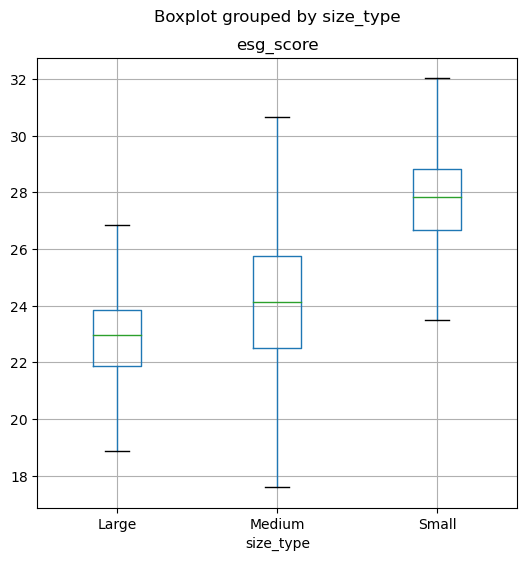

In [27]:
df2_mutual_funds.boxplot(column='esg_score',by='size_type',showfliers=False, figsize=(6,6))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


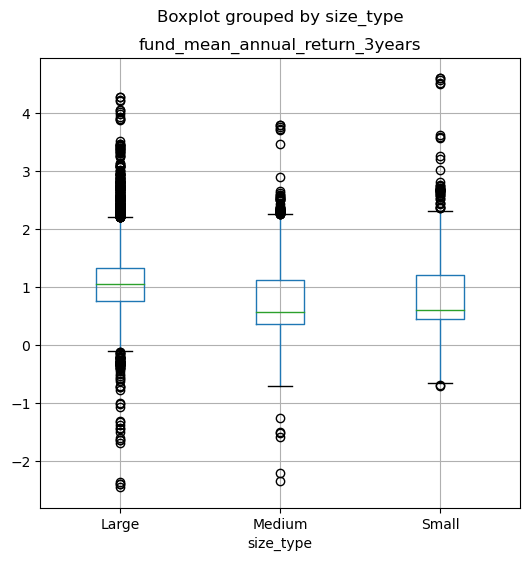

In [28]:
df2_mutual_funds.boxplot(column='fund_mean_annual_return_3years',by='size_type',figsize=(6,6))
plt.legend().remove()


<Axes: title={'center': 'fund_mean_annual_return_3years'}, xlabel='size_type'>

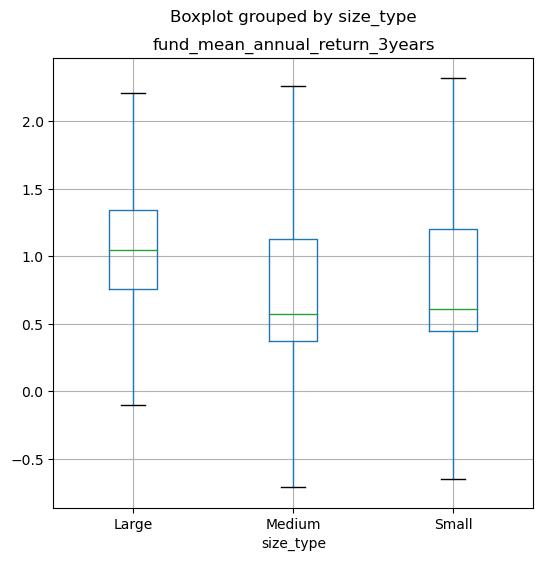

In [29]:
df2_mutual_funds.boxplot(column='fund_mean_annual_return_3years',by='size_type', showfliers=False, figsize=(6,6))

## 5 years

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


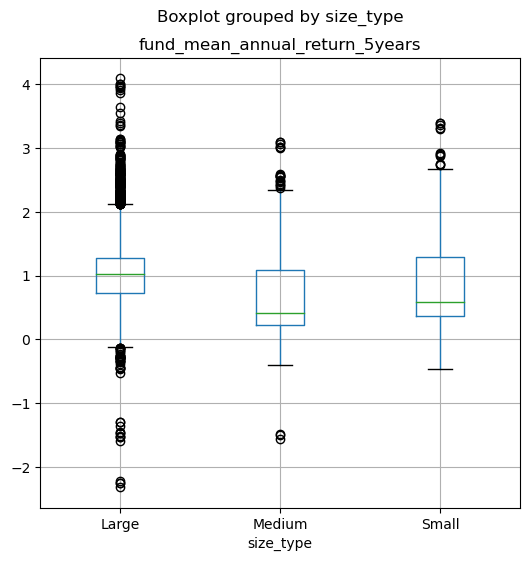

In [30]:
df2_mutual_funds.boxplot(column='fund_mean_annual_return_5years',by='size_type',figsize=(6,6))
plt.legend().remove()


## 10 years

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


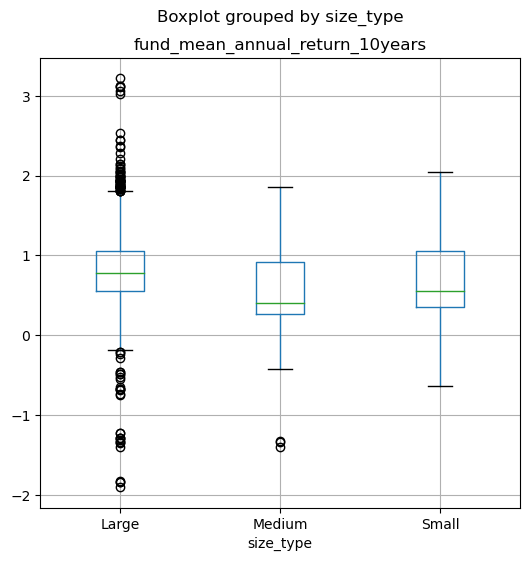

In [31]:
df2_mutual_funds.boxplot(column='fund_mean_annual_return_10years',by='size_type',figsize=(6,6))
plt.legend().remove()


## Yield

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


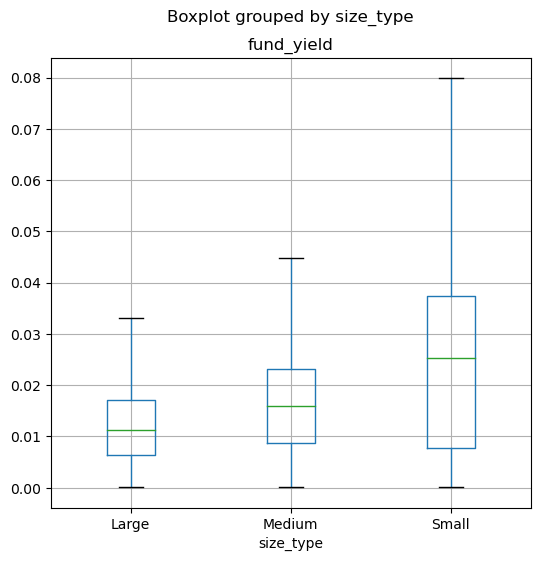

In [32]:
df2_mutual_funds.boxplot(column='fund_yield',by='size_type',showfliers=False, figsize=(6,6))
plt.legend().remove()

# Risk 1 : Alpha for Outperformance , the higher , the better 

## 3 years

<Axes: title={'center': 'fund_alpha_3years'}, xlabel='size_type'>

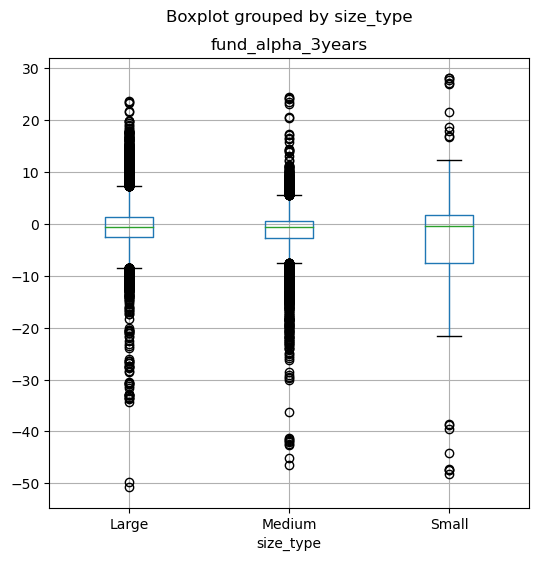

In [33]:
df2_mutual_funds.boxplot(column='fund_alpha_3years',by='size_type',figsize=(6,6))

## 5 years

<Axes: title={'center': 'fund_alpha_5years'}, xlabel='size_type'>

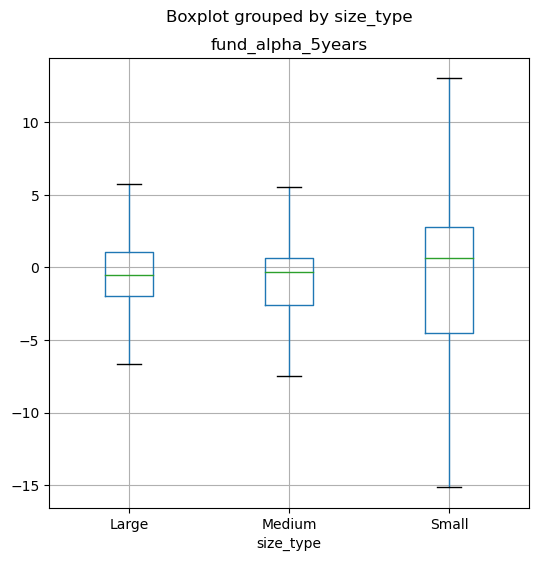

In [34]:
df2_mutual_funds.boxplot(column='fund_alpha_5years',by='size_type', showfliers=False, figsize=(6,6))

## 10 years

<Axes: title={'center': 'fund_alpha_10years'}, xlabel='size_type'>

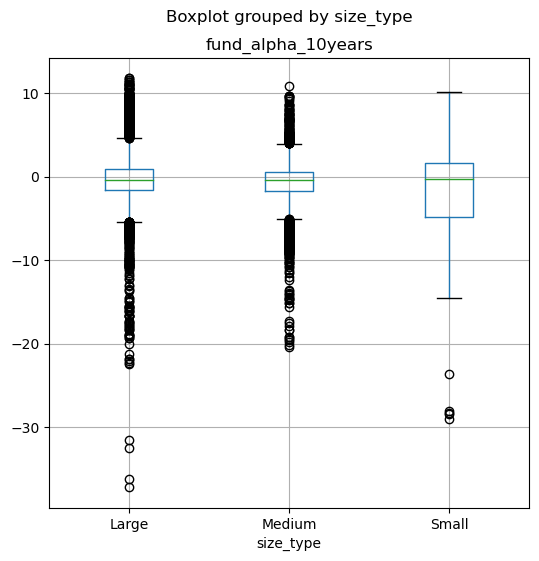

In [35]:
df2_mutual_funds.boxplot(column='fund_alpha_10years',by='size_type',figsize=(6,6))

## Risk 2 : Beta , the lower , the better

## 3 years

<Axes: title={'center': 'fund_beta_3years'}, xlabel='size_type'>

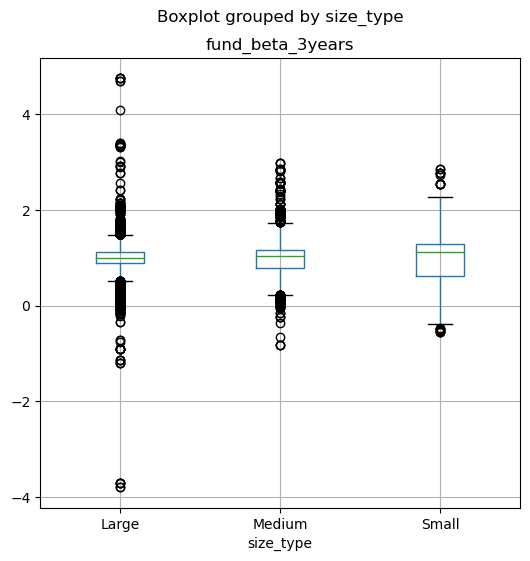

In [36]:
df2_mutual_funds.boxplot(column='fund_beta_3years',by='size_type',figsize=(6,6))

## 5 years

<Axes: title={'center': 'fund_beta_5years'}, xlabel='size_type'>

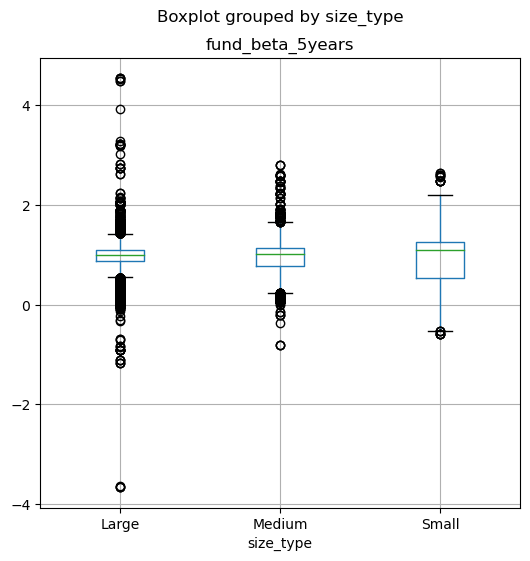

In [37]:
df2_mutual_funds.boxplot(column='fund_beta_5years',by='size_type',figsize=(6,6))

## 10 years

<Axes: title={'center': 'fund_beta_10years'}, xlabel='size_type'>

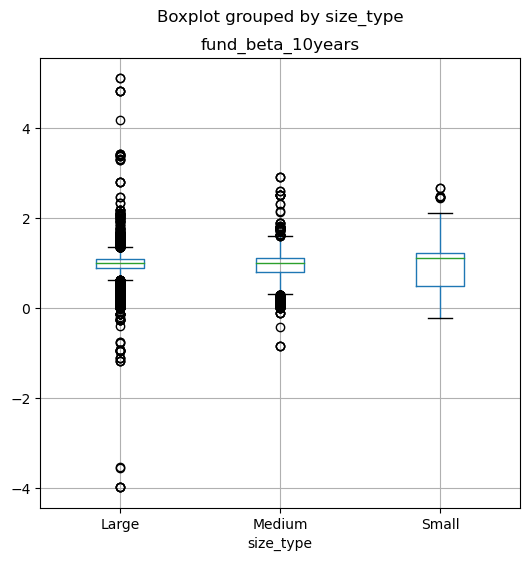

In [38]:
df2_mutual_funds.boxplot(column='fund_beta_10years',by='size_type',figsize=(6,6))

## Sharpe 

## 3 years

<Axes: title={'center': 'fund_sharpe_ratio_3years'}, xlabel='size_type'>

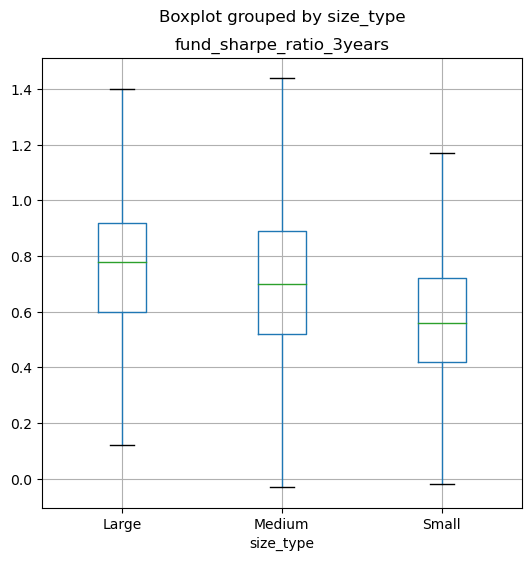

In [39]:
df2_mutual_funds.boxplot(column='fund_sharpe_ratio_3years',by='size_type',showfliers=False,figsize=(6,6))

## 5 years 

<Axes: title={'center': 'fund_sharpe_ratio_5years'}, xlabel='size_type'>

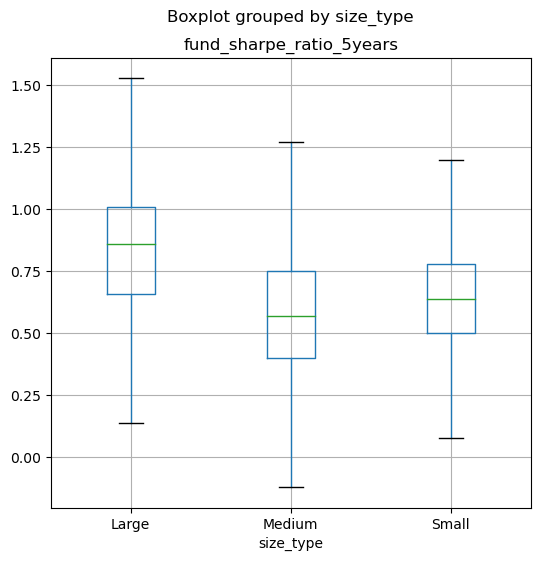

In [40]:
df2_mutual_funds.boxplot(column='fund_sharpe_ratio_5years',by='size_type',showfliers=False,figsize=(6,6))

## Fees 

<Axes: title={'center': 'fund_annual_report_net_expense_ratio'}, xlabel='size_type'>

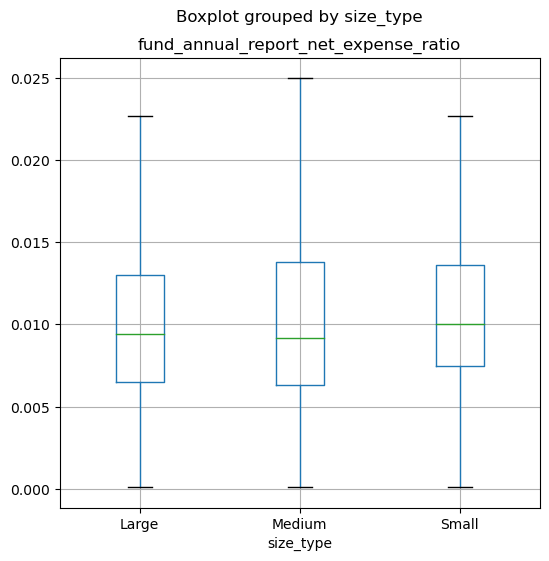

In [41]:
df2_mutual_funds.boxplot(column='fund_annual_report_net_expense_ratio',by='size_type',showfliers=False, figsize=(6,6))


<Axes: title={'center': 'initial_investment'}, xlabel='size_type'>

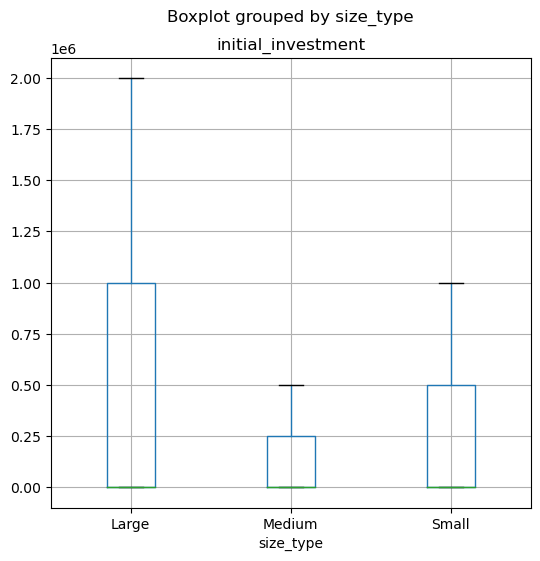

In [42]:
df2_mutual_funds.boxplot(column='initial_investment',by='size_type',showfliers=False, figsize=(6,6))

##  Yearly Return per size type

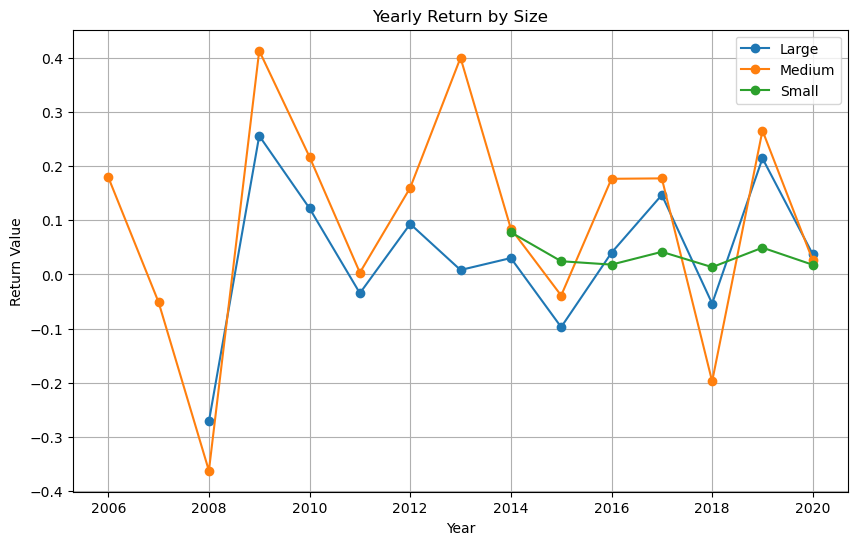

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Size
grouped_data = df2_mutual_funds.groupby('size_type')

# Plotting
plt.figure(figsize=(10, 6))

for size_type, group in grouped_data:
    # Limit the number of funds to 20,000
    if len(group) > 23782:
        group = group.head(23782)
        
    years = []
    returns = []
    
    for col in group.columns:
        if col.startswith('fund_return_') and not col.endswith('_q1') and not col.endswith('_q2') and not col.endswith('_q3') and not col.endswith('_q4'):
            try:
                year = int(col.split('_')[2])
                years.append(year)
                returns.append(group[col].values[0])
            except (IndexError, ValueError):
                continue
    
    plt.plot(years, returns, marker='o', label=size_type)

plt.xlabel('Year')
plt.ylabel('Return Value')
plt.title('Yearly Return by Size')
plt.legend()
plt.grid(True)

plt.show()


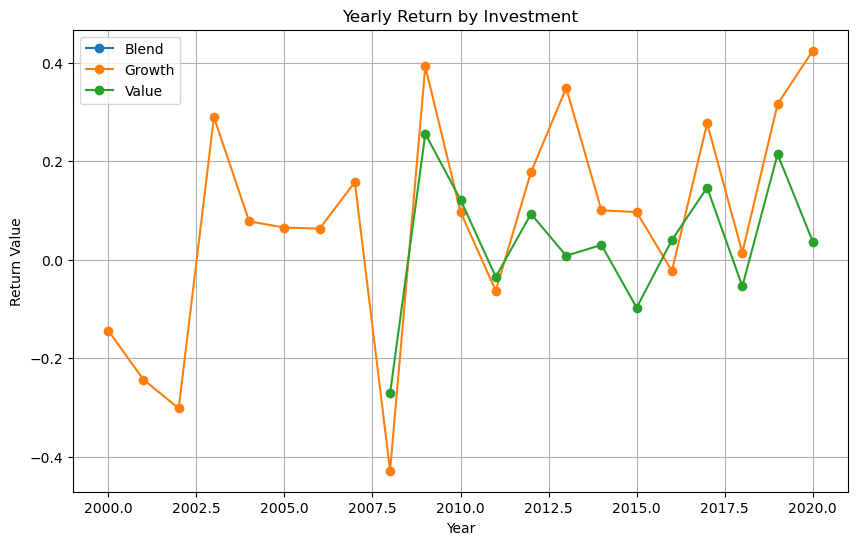

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Size
grouped_data = df2_mutual_funds.groupby('investment_type')

# Plotting
plt.figure(figsize=(10, 6))

for size_type, group in grouped_data:
    # Limit the number of funds to 20,000
    if len(group) > 23782:
        group = group.head(23782)
        
    years = []
    returns = []
    
    for col in group.columns:
        if col.startswith('fund_return_') and not col.endswith('_q1') and not col.endswith('_q2') and not col.endswith('_q3') and not col.endswith('_q4'):
            try:
                year = int(col.split('_')[2])
                years.append(year)
                returns.append(group[col].values[0])
            except (IndexError, ValueError):
                continue
    
    plt.plot(years, returns, marker='o', label=size_type)

plt.xlabel('Year')
plt.ylabel('Return Value')
plt.title('Yearly Return by Investment')
plt.legend()
plt.grid(True)


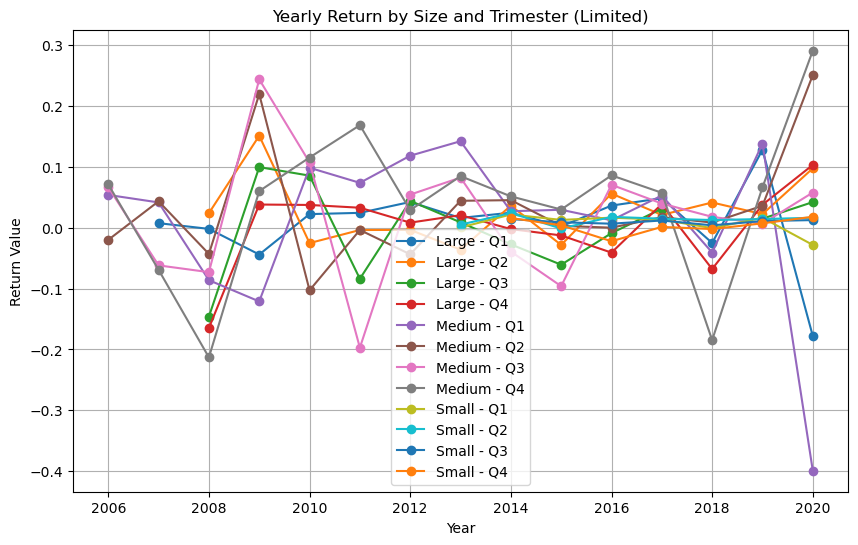

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Size
grouped_data = df2_mutual_funds.groupby('size_type')

# Plotting
plt.figure(figsize=(10, 6))

# Define the years
years = range(2000, 2021)

for size_type, group in grouped_data:
    # Limit the number of funds to 23000
    if len(group) > 23782:
        group = group.head(23782)
    
    returns_q1 = [group[f'fund_return_{year}_q1'].values[0] if f'fund_return_{year}_q1' in group.columns else None for year in years]
    returns_q2 = [group[f'fund_return_{year}_q2'].values[0] if f'fund_return_{year}_q2' in group.columns else None for year in years]
    returns_q3 = [group[f'fund_return_{year}_q3'].values[0] if f'fund_return_{year}_q3' in group.columns else None for year in years]
    returns_q4 = [group[f'fund_return_{year}_q4'].values[0] if f'fund_return_{year}_q4' in group.columns else None for year in years]
    
    # Remove None values from the lists
    returns_q1 = [r for r in returns_q1 if r is not None]
    returns_q2 = [r for r in returns_q2 if r is not None]
    returns_q3 = [r for r in returns_q3 if r is not None]
    returns_q4 = [r for r in returns_q4 if r is not None]
    
    plt.plot(years[:len(returns_q1)], returns_q1, marker='o', label=size_type + ' - Q1')
    plt.plot(years[:len(returns_q2)], returns_q2, marker='o', label=size_type + ' - Q2')
    plt.plot(years[:len(returns_q3)], returns_q3, marker='o', label=size_type + ' - Q3')
    plt.plot(years[:len(returns_q4)], returns_q4, marker='o', label=size_type + ' - Q4')

plt.xlabel('Year')
plt.ylabel('Return Value')
plt.title('Yearly Return by Size and Trimester (Limited)')
plt.legend()
plt.grid(True)

plt.show()


In [46]:
# Group the data by Size
grouped_data = df2_mutual_funds.groupby('Size')

# Plotting
plt.figure(figsize=(8, 6))

for size, group in grouped_data:
    plt.plot(group['Year'], group['Return'], marker='o', label=size)

plt.xlabel('Year')
plt.ylabel('Return Value')
plt.title('Year-to-Year Return by Size')
plt.legend()
plt.grid(True)

plt.show()


KeyError: 'Size'

## ESG Risk level and Return 10 years

In [49]:
def classify_esg_score(esg_score):
    if esg_score <= 20:
        return  'Low'
    elif esg_score <= 30:
        return 'Medium'
    elif esg_score > 30:
        return 'High'
     

# Assuming 'risk' column contains the risk values for each mutual fund
df2_mutual_funds['esg_risk_level'] = df2_mutual_funds['esg_score'].apply(classify_esg_score)


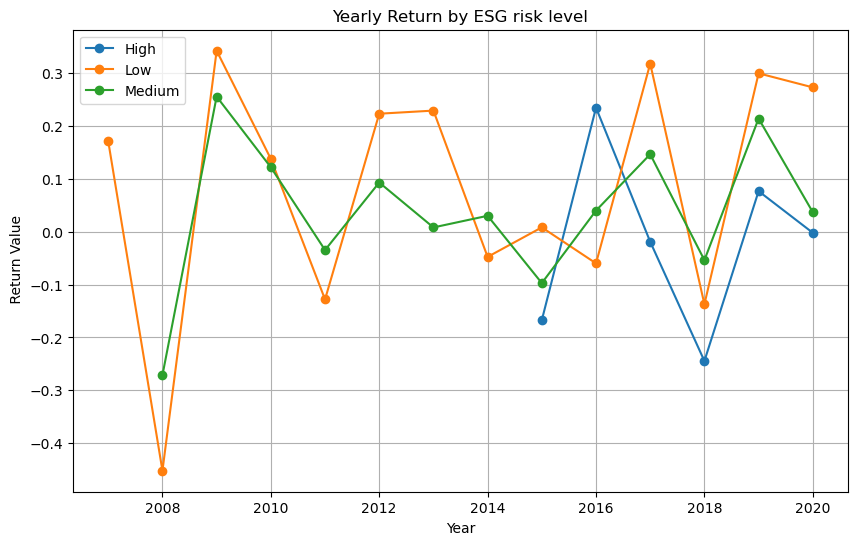

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Size
grouped_data = df2_mutual_funds.groupby('esg_risk_level')

# Plotting
plt.figure(figsize=(10, 6))

for size_type, group in grouped_data:
    # Limit the number of funds to 100
    if len(group) > 20000:
        group = group.head(20000)
    years = []
    returns = []
    for col in group.columns:
         if col.startswith('fund_return_') and not col.endswith('_q1') and not col.endswith('_q2') and not col.endswith('_q3') and not col.endswith('_q4'):
            try:
                year = int(col.split('_')[2])
                years.append(year)
                returns.append(group[col].values[0])
            except (IndexError, ValueError):
                continue
    
    plt.plot(years, returns, marker='o', label=size_type)

plt.xlabel('Year')
plt.ylabel(' Return Value')
plt.title('Yearly Return by ESG risk level')
plt.legend()
plt.grid(True)

plt.show()

<Axes: title={'center': 'fund_beta_10years'}, xlabel='esg_risk_level'>

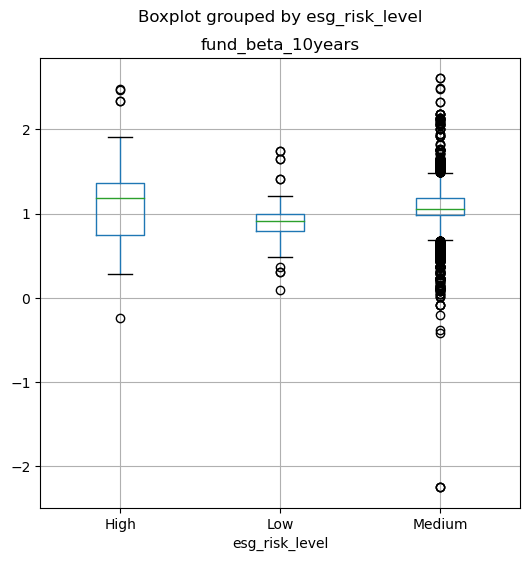

In [52]:
df2_mutual_funds.boxplot(column='fund_beta_10years',by='esg_risk_level',figsize=(6,6))

<Axes: title={'center': 'fund_mean_annual_return_10years'}, xlabel='esg_risk_level'>

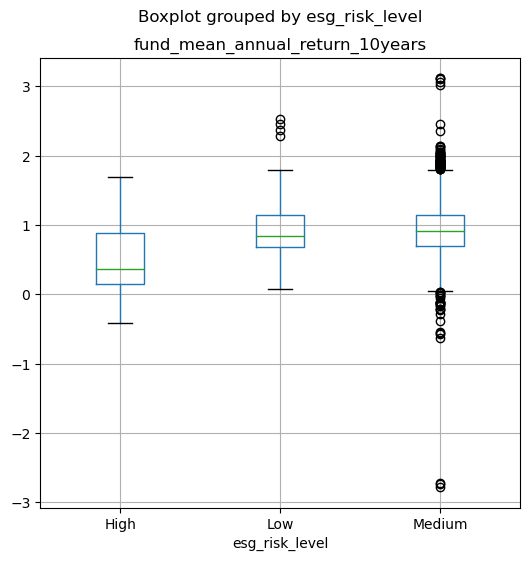

In [53]:
df2_mutual_funds.boxplot(column='fund_mean_annual_return_10years',by='esg_risk_level',figsize=(6,6))

<Axes: title={'center': 'fund_alpha_10years'}, xlabel='esg_risk_level'>

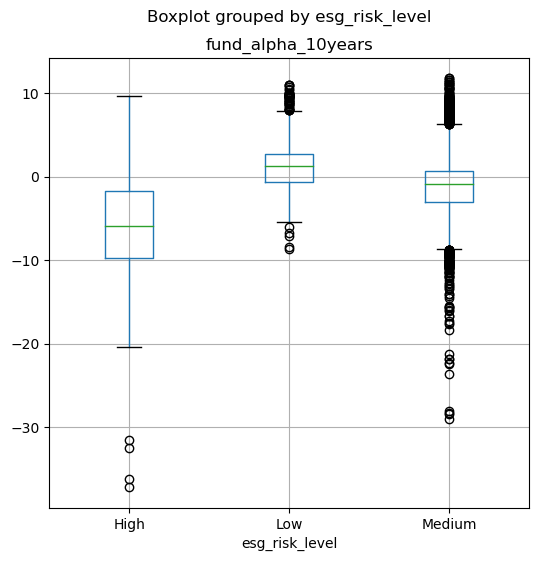

In [56]:
df2_mutual_funds.boxplot(column='fund_alpha_10years',by='esg_risk_level',figsize=(6,6))

<Axes: title={'center': 'fund_sharpe_ratio_10years'}, xlabel='esg_risk_level'>

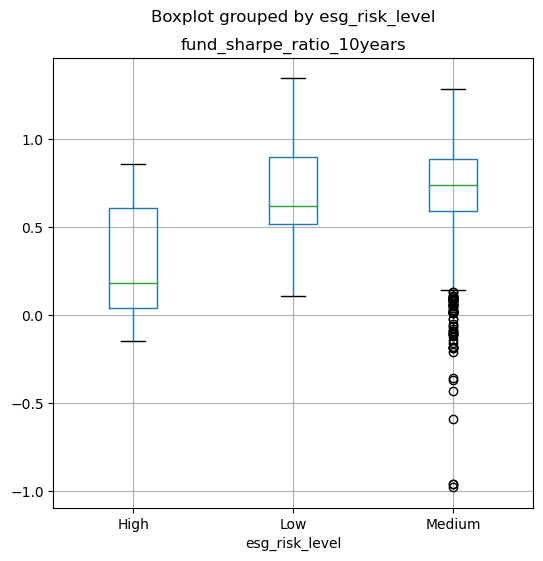

In [58]:
df2_mutual_funds.boxplot(column='fund_sharpe_ratio_10years',by='esg_risk_level',figsize=(6,6))